___
# K Means Performance Evaluation

* This project applies the K-Means Clustering algorithm to group universities into two distinct clusters, with the objective of discovering natural groupings based on institutional characteristics. The dataset includes information such as application numbers, enrollment stats, faculty ratios, expenditures, and graduation rates.

* Although the dataset includes the true labels (i.e., whether a university is Private or Public), these labels are intentionally not used during clustering

* As K-Means is an unsupervised learning algorithm. Instead, we use the labels after clustering to assess how well the algorithm’s output aligns with reality.
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [322]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 150

## Importing Data

In [324]:
df = pd.read_csv('College_Data', index_col = 0, header = 0)

In [325]:
df.head(10)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [327]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA


**1. Scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column:**

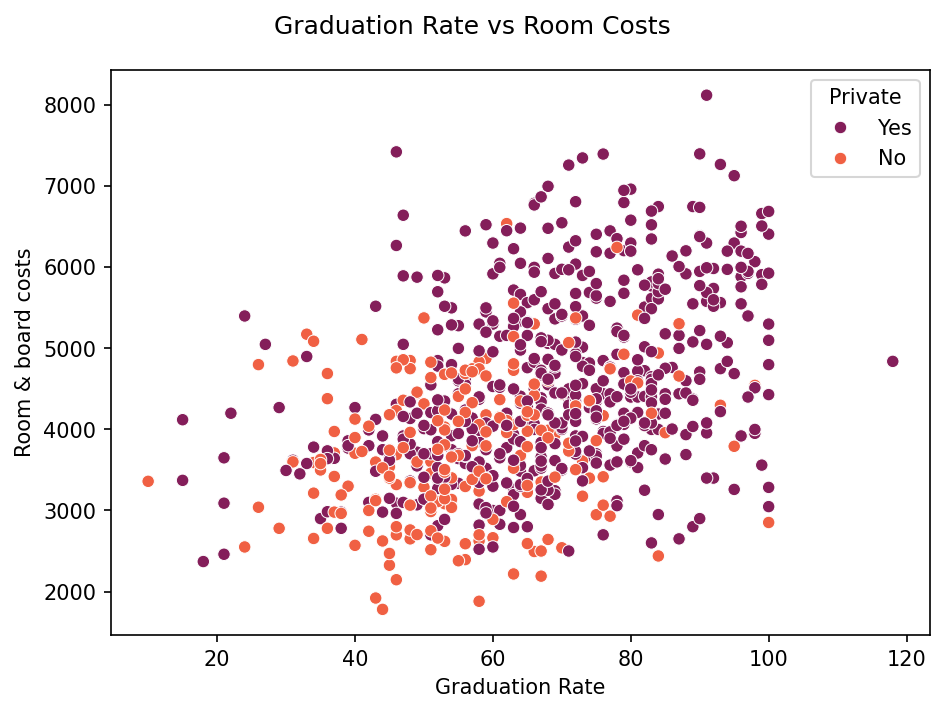

In [329]:
sns.scatterplot(x = 'Grad.Rate' , y = 'Room.Board' , hue = 'Private', data = df, palette = 'rocket' )

plt.xlabel('Graduation Rate')
plt.ylabel('Room & board costs')
plt.suptitle('Graduation Rate vs Room Costs')

plt.tight_layout()

plt.show()

**2. Scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column:**

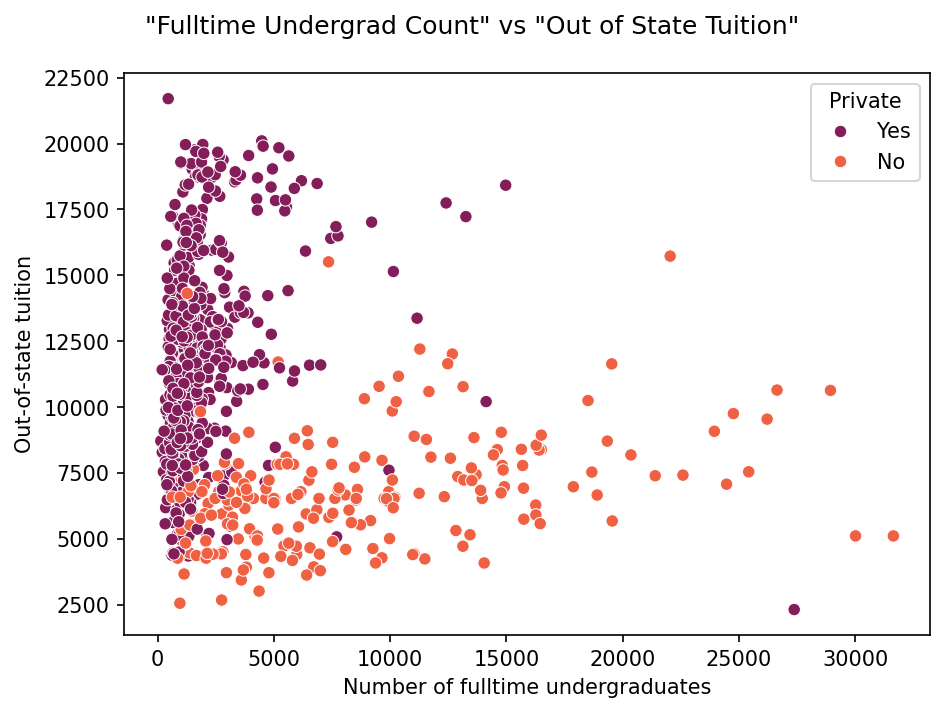

In [331]:
sns.scatterplot( x = 'F.Undergrad' , y = 'Outstate' , data = df , hue = 'Private', palette = 'rocket')

plt.xlabel('Number of fulltime undergraduates')
plt.ylabel('Out-of-state tuition')
plt.suptitle('"Fulltime Undergrad Count" vs "Out of State Tuition"')

plt.tight_layout()

plt.show()

**3. Stacked histogram showing Out of State Tuition based on the Private column:**

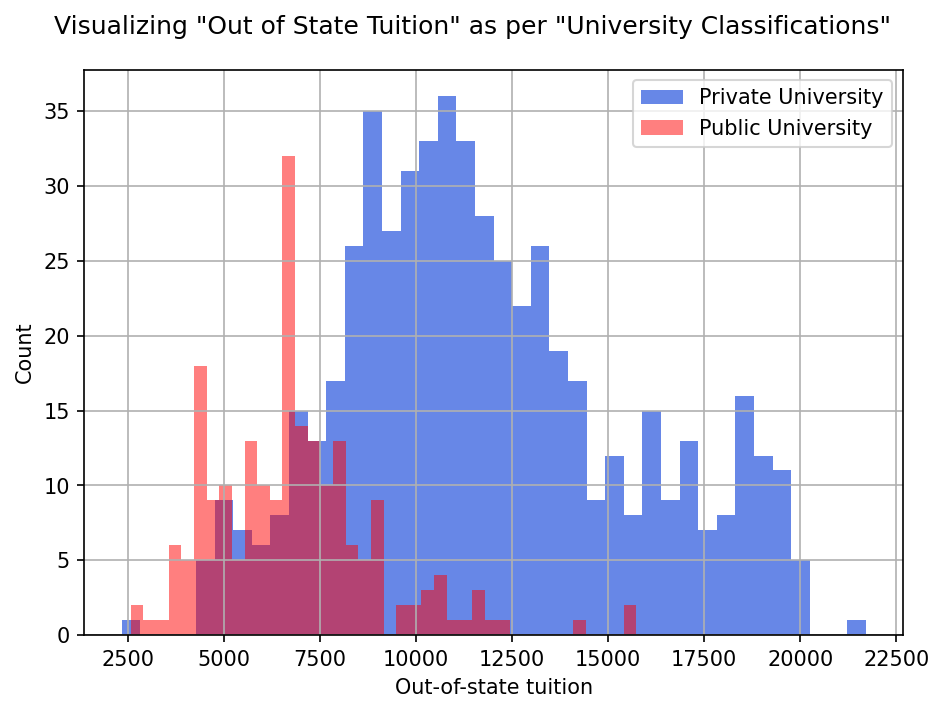

In [335]:
Private = df[df['Private'] == 'Yes']
Public = df[df['Private'] == 'No']

Private['Outstate'].hist(alpha = 0.8 , color = 'royalblue', bins = 40, label = 'Private University')
Public['Outstate'].hist(alpha = 0.5 , color = 'red', bins = 40, label = 'Public University')

plt.legend()

plt.xlabel('Out-of-state tuition')
plt.ylabel('Count')
plt.suptitle('Visualizing "Out of State Tuition" as per "University Classifications"')

plt.tight_layout()

plt.show()

**4. Stacked histogram to analyze Graduation Rate based on the Private column:**

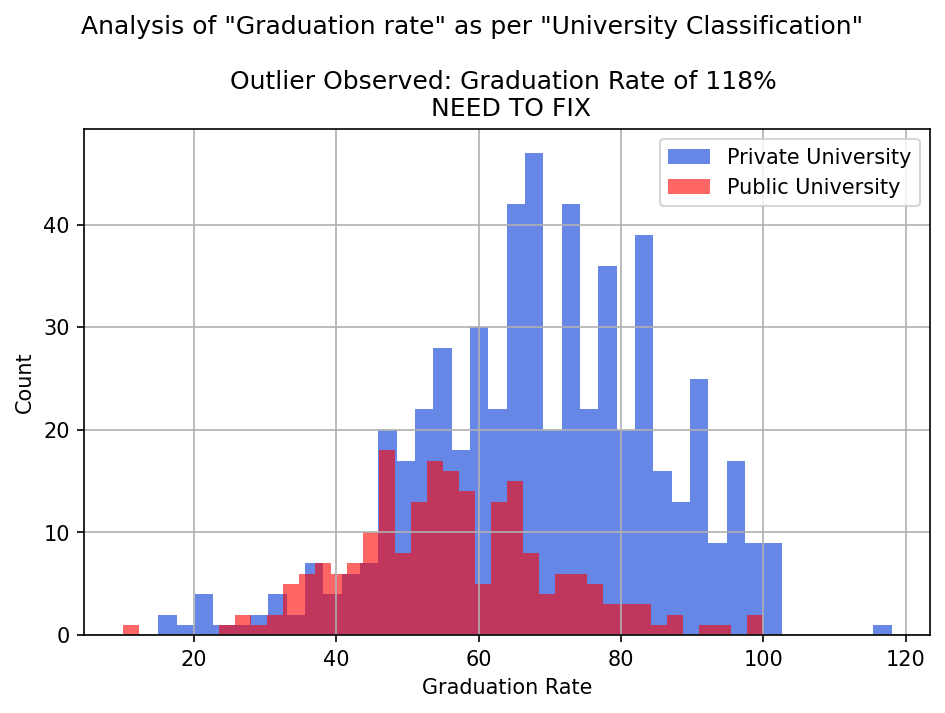

In [337]:
Private = df[df['Private'] == 'Yes']
Public = df[df['Private'] == 'No']

Private['Grad.Rate'].hist(bins =40, color = 'royalblue', alpha = 0.8, label = 'Private University')
Public['Grad.Rate'].hist(bins = 40, color = 'red', alpha = 0.6, label = 'Public University')

plt.legend()

plt.xlabel('Graduation Rate')
plt.ylabel('Count')
plt.suptitle('Analysis of "Graduation rate" as per "University Classification"')
plt.title("Outlier Observed: Graduation Rate of 118% \n NEED TO FIX")

plt.tight_layout()

plt.show()

## Fixing Incorrect Value obsered in EDA

In [339]:
above100_gr = df[df['Grad.Rate'] > 100]

above100_gr.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**NOTE: Cazenovia College has Graduation Rate of 118**

**Replacing the 118% to 100%, and again plotting the graph to check update:**

In [342]:
# Replacing 118 to 100:
df['Grad.Rate'] = df['Grad.Rate'].replace({118 : 100})

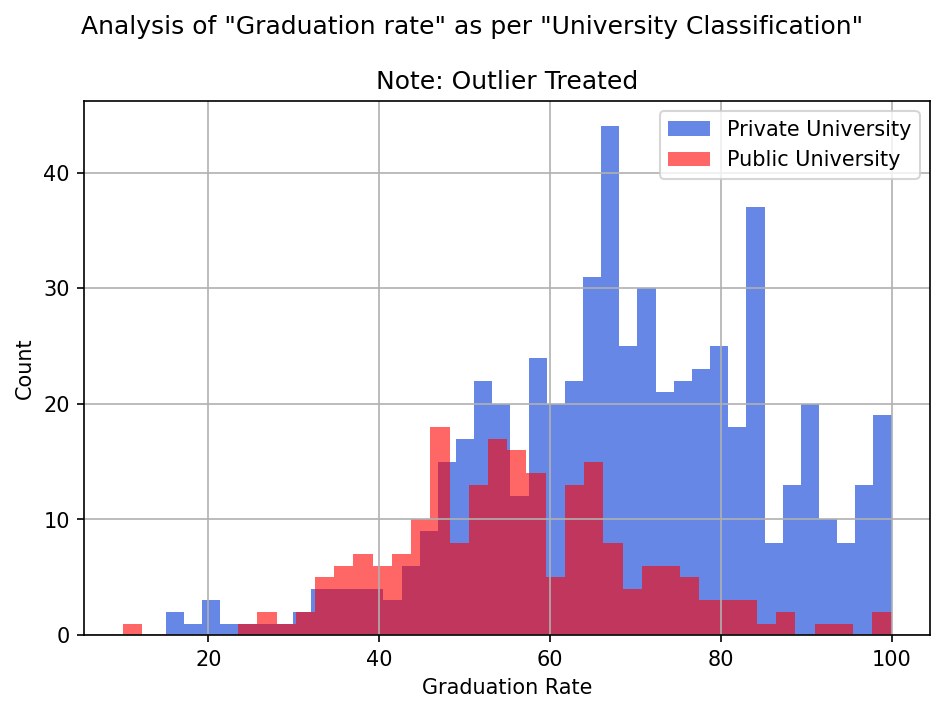

In [343]:
Private = df[df['Private'] == 'Yes']
Public = df[df['Private'] == 'No']


Private['Grad.Rate'].hist(bins =40, color = 'royalblue', alpha = 0.8, label = 'Private University')
Public['Grad.Rate'].hist(bins = 40, color = 'red', alpha = 0.6, label = 'Public University')

plt.legend()

plt.xlabel('Graduation Rate')
plt.ylabel('Count')
plt.suptitle('Analysis of "Graduation rate" as per "University Classification"')
plt.title('Note: Outlier Treated')

plt.tight_layout()

plt.show()

## K Means Cluster Creation

In [345]:
from sklearn.cluster import KMeans

In [346]:
#2 clusters: Public or Private University
km = KMeans(n_clusters = 2)

In [347]:
db = df.drop('Private', axis =1)

km.fit(db)

KMeans(n_clusters=2)

In [348]:
km.cluster_centers_

array([[1.00549109e+04, 6.73820792e+03, 2.74102970e+03, 3.29702970e+01,
        6.39009901e+01, 1.42840297e+04, 2.94107921e+03, 8.58346535e+03,
        4.21270297e+03, 5.83079208e+02, 1.85466337e+03, 8.35940594e+01,
        8.90990099e+01, 1.61673267e+01, 1.62970297e+01, 9.95570297e+03,
        6.17623762e+01],
       [1.94782101e+03, 1.31368639e+03, 4.86974852e+02, 2.67500000e+01,
        5.45857988e+01, 2.11855178e+03, 5.43665680e+02, 1.07181509e+04,
        4.37916420e+03, 5.44346154e+02, 1.26384320e+03, 7.10266272e+01,
        7.82988166e+01, 1.37792899e+01, 2.37071006e+01, 9.61601627e+03,
        6.59896450e+01]])

## Evaluation

**Creating a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [350]:
df['Cluster'] = pd.get_dummies(df['Private'], drop_first = True).astype(int)

In [351]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Final Dataset for Evaluating the results of K Means Clustering:**

In [352]:
db_f = df.drop('Private', axis =1)
db_f.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [385]:
from sklearn.metrics import confusion_matrix, classification_report

print('CONFUSION MATRIX:')
print(confusion_matrix( db_f['Cluster'] , km.labels_ ))

print('\n')

print('CLASSIFICATION REPORT:')
print(classification_report( db_f['Cluster'] , km.labels_ ))

CONFUSION MATRIX:
[[ 89 123]
 [ 12 553]]


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.42      0.57       212
           1       0.82      0.98      0.89       565

    accuracy                           0.83       777
   macro avg       0.85      0.70      0.73       777
weighted avg       0.84      0.83      0.80       777



**Visualizing the Efficiency of K means Clustering by testing on "Fulltime Undergrad Count" vs "Out of State Tuition**

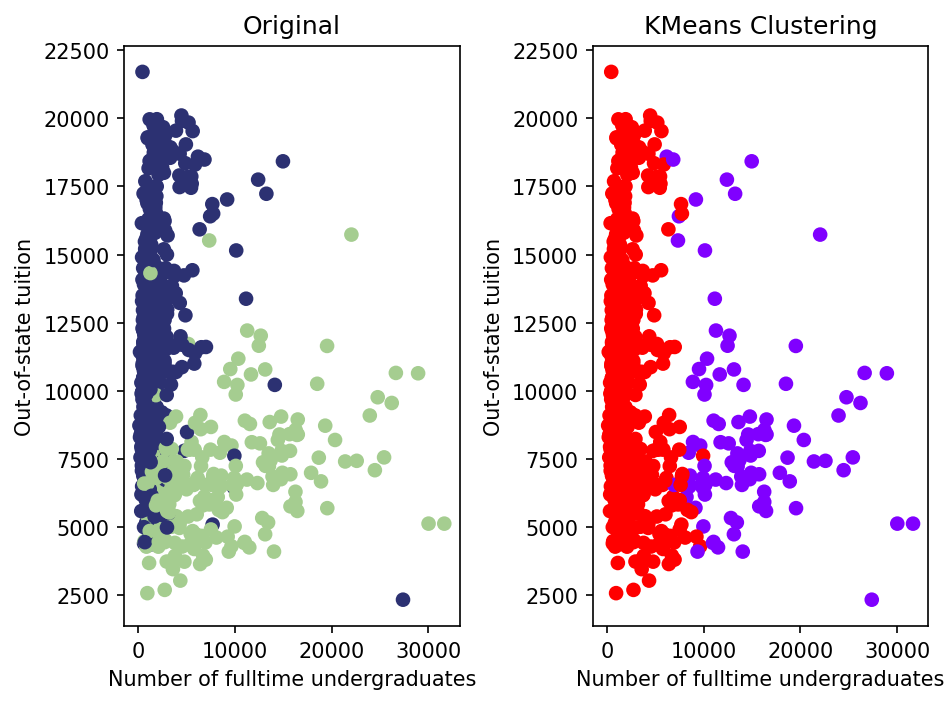

In [387]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)

axes[0].scatter( x = db_f['F.Undergrad'] , y = db_f['Outstate'] , c = db_f['Cluster'], cmap = 'crest')
axes[0].set_xlabel('Number of fulltime undergraduates')
axes[0].set_ylabel('Out-of-state tuition')
axes[0].set_title('Original')


axes[1].scatter( x = db_f['F.Undergrad'] , y = db_f['Outstate'] , c = km.labels_, cmap = 'rainbow'  )
axes[1].set_xlabel('Number of fulltime undergraduates')
axes[1].set_ylabel('Out-of-state tuition')
axes[1].set_title('KMeans Clustering')

plt.tight_layout()
plt.show()

# Colours do represent any fixed cluster. It is just mean of differentiating between both categories... 

## Conclusion:
* K-Means clustering achieved an 83% accuracy when compared against true university types (Private vs Public), showing strong overall performance.
* It classified private institutions very well (recall: 0.98), but had lower recall (0.42) for public ones, indicating some misclassification.
* Despite this, the high F1-score (0.80 weighted average) confirms that K-Means successfully identified meaningful patterns in the data, even without using labels.

---
## END